/opt/anaconda3/envs/dev/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


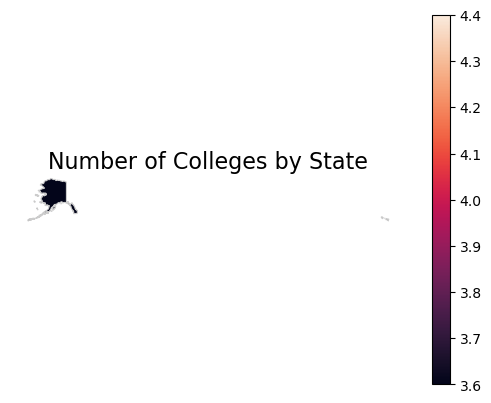

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisquare
from scipy.stats import ttest_ind
import geopandas
from IPython.display import display

import geopandas as gpd
import geoplot.crs as gcrs
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable

college_df = pd.read_excel(io='data/geocode_college_with_address.xlsx', index_col=0)


shapefile_path = 'data/original_data/tl_2016_us_state.shp'
gdf = gpd.GeoDataFrame.from_file(shapefile_path)


count_state_df = college_df[(college_df['State']="AK")&\
    (college_df['State']!="HI")].groupby('State')['State'].count().reset_index(name='Count')

gdf = gdf.merge(count_state_df, left_on='STUSPS', right_on='State', how='inner')
gdf.plot(column='Count', cmap='rocket', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Number of Colleges by State', fontsize=16)
plt.axis('off')
plt.savefig('images/number_of_colleges_by_state.png', dpi=300, bbox_inches='tight')
plt.show()


# # Remove axes
# ax.axis('off')

# Show plot
plt.show()